# EV Market: Target Customer Demographic, Behavioral, Psychographic and Geographic Analysis

## By Simar Ahuja

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [2]:
data= pd.read_csv('statewise_details.csv')
data.head()

,Age,City,Gender,Education Level,Occupation,Family Members,Annual Income,Charging Hours,Electric Cars are economical,Charging stations,Convert your car to all electric,Hybrid or Both,Next car will be electric car?
0,29,Kolkata,Male,Postgraduate,Working Professional,5,150000,1,Yes,15,Yes,Hybrid car,5
1,29,Mumbai,Male,Graduate,Working Professional,4,1000000,1,Yes,8,Yes,Electric car,5
2,25,Mumbai,Male,Graduate,Working Professional,4,5000,5,Yes,15,Didn't think about it,Hybrid car,5
3,25,Bangalore,Male,Graduate,Working Professional,4,750000,1,Don't know,8,Didn't think about it,Hybrid car,5
4,21,Mumbai,Male,Postgraduate,Student,4,5000,12,Don't know,15,Didn't think about it,Hybrid car,5


## Data Pre-processing

In [16]:
# Handle missing values, if any
data.dropna(inplace=True)
X = data.drop(columns=['Next car will be electric car?'])
y = data['Next car will be electric car?']
# List of non-numeric columns that need encoding
categorical_columns = ['City', 'Gender', 'Education Level', 'Occupation','Electric Cars are economical','Convert your car to all electric', 'Hybrid or Both']

# Perform one-hot encoding for each non-numeric column
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Now, the non-numeric columns have been encoded into a numeric format.




## Exploratory Data Analysis(EDA)



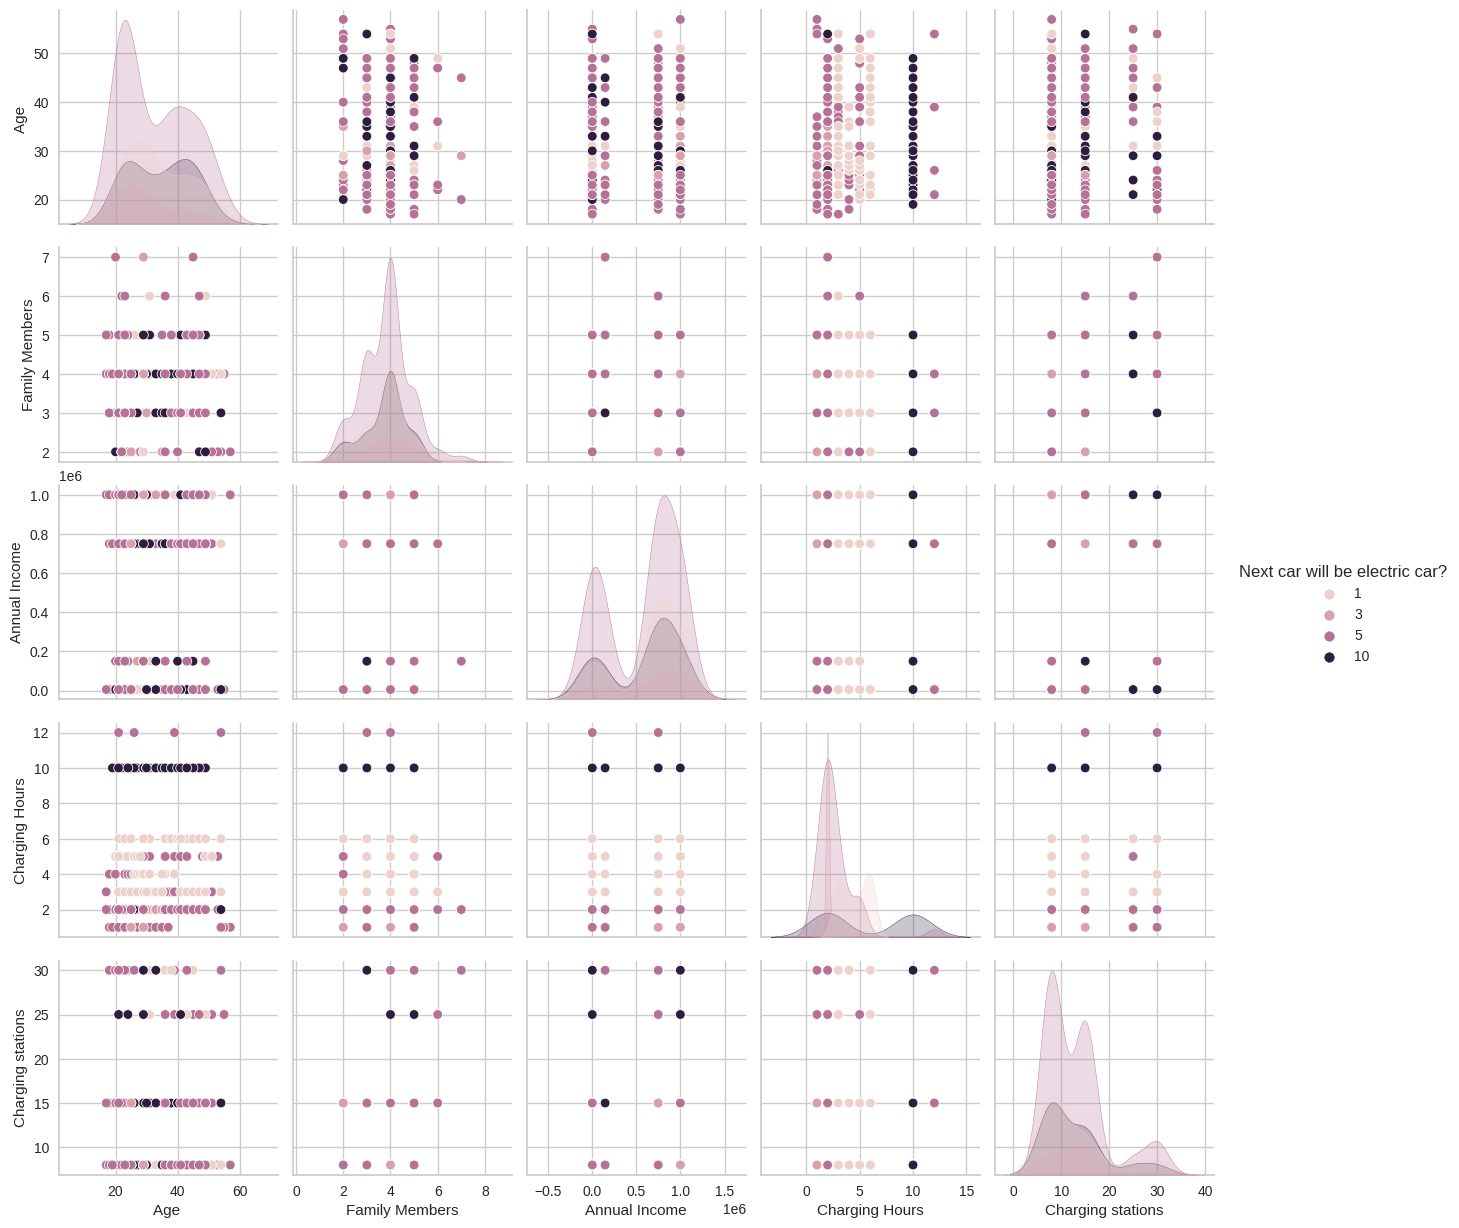

In [4]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(data, hue='Next car will be electric car?', diag_kind='kde')
plt.show()


<ipython-input-5-fd3b2d947e08>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


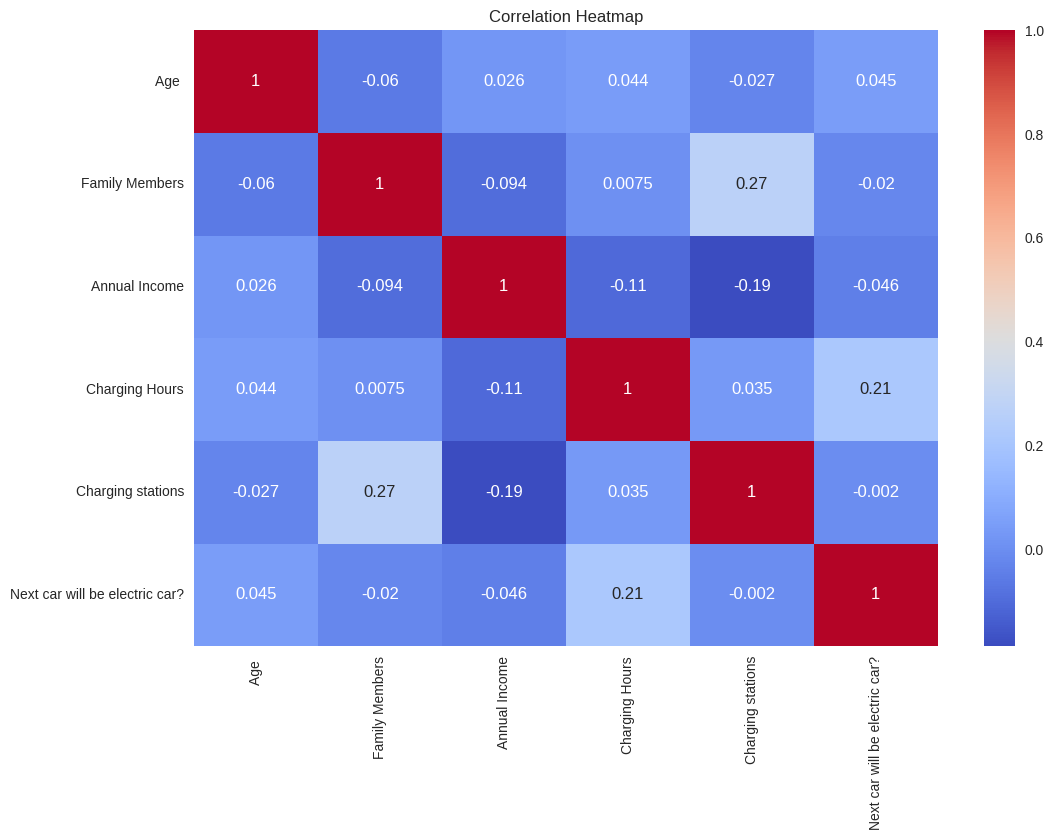

In [5]:
# Correlation Heatmap to examine correlations between variables
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

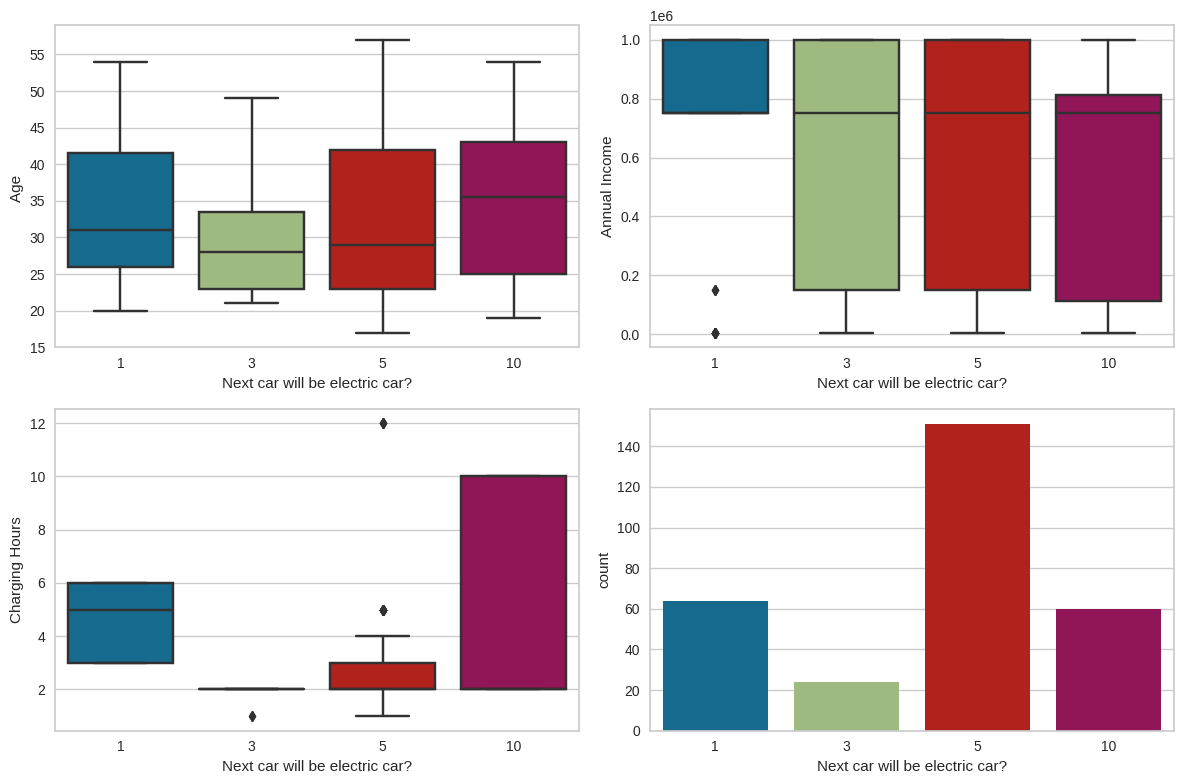

In [7]:
# Boxplots to identify potential differences between target groups
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.boxplot(x='Next car will be electric car?', y='Age ', data=data, ax=axes[0, 0])
sns.boxplot(x='Next car will be electric car?', y='Annual Income', data=data, ax=axes[0, 1])
sns.boxplot(x='Next car will be electric car?', y='Charging Hours', data=data, ax=axes[1, 0])
sns.countplot(x='Next car will be electric car?', data=data, ax=axes[1, 1])
plt.tight_layout()
plt.show()

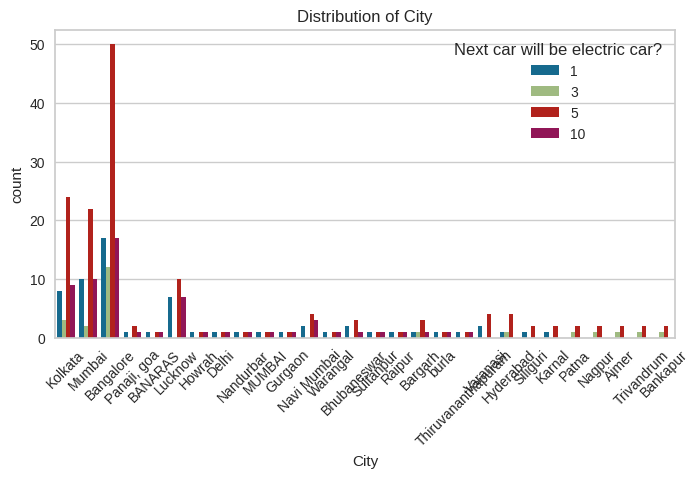

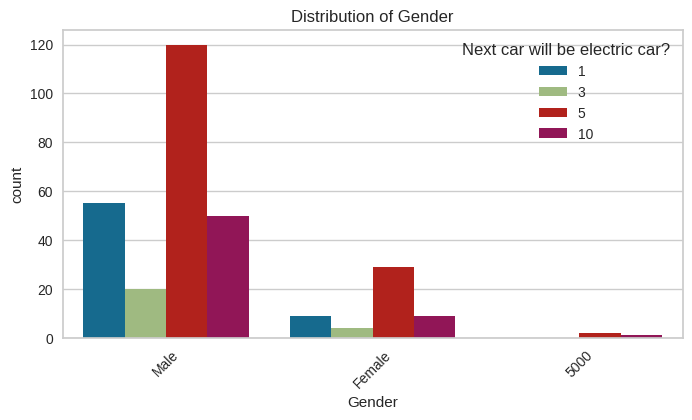

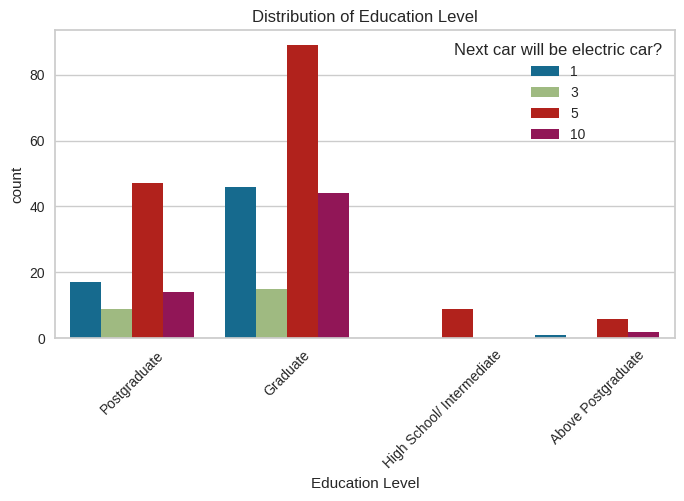

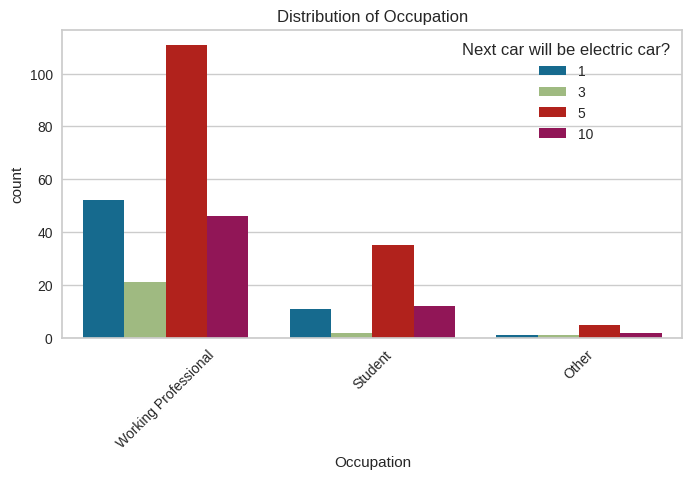

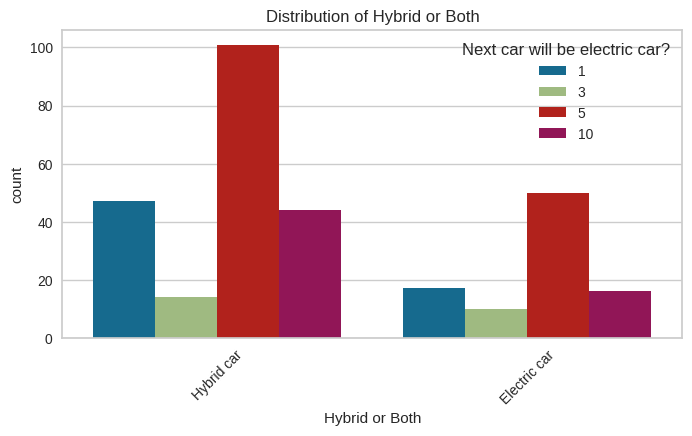

In [8]:

# Distribution of categorical variables
categorical_variables = ['City', 'Gender', 'Education Level', 'Occupation', 'Hybrid or Both']
for col in categorical_variables:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data, hue='Next car will be electric car?')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Perform K-Means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

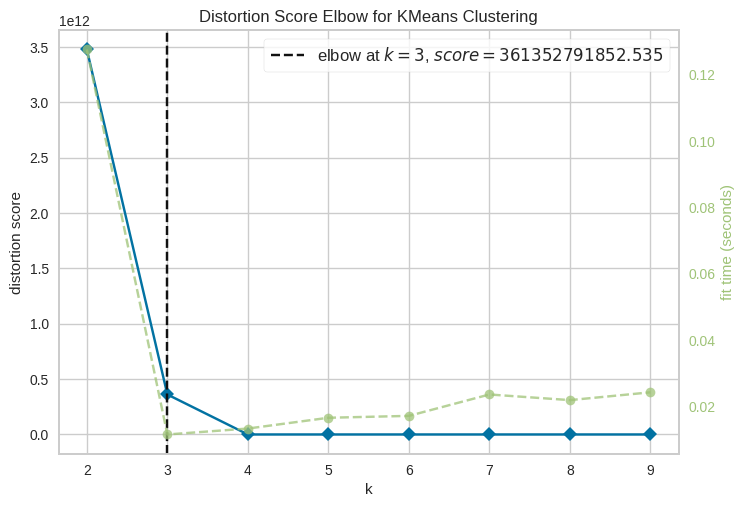

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Determine the optimal number of clusters (k) using the Elbow method and Silhouette score
visualizer = KElbowVisualizer(KMeans(), k=(2, 10))
visualizer.fit(X_pca)
visualizer.poof()

# Based on the Elbow method and Silhouette score, select the optimal number of clusters
k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_pca)

## Describing Segments


KeyError: ignored

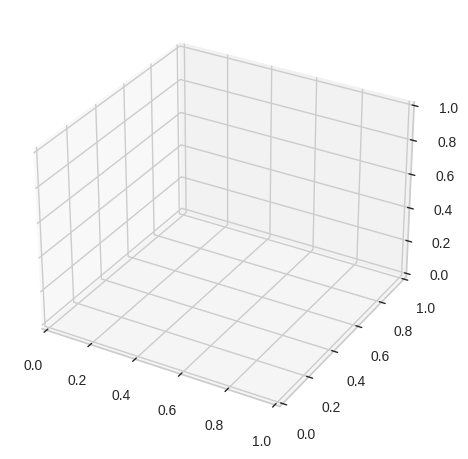

In [19]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2', 'PC3'])
data['Cluster'] = data['Cluster'].astype('category')

# Advanced Visualization (3D Scatter Plot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    segment = data[data['Cluster'] == i]
    ax.scatter(segment['PC1'], segment['PC2'], segment['PC3'], c=color, label=f'Cluster {i}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()


## Selecting the Target Segments

- Assumption 1: We will prioritize segments with higher annual income as they are more likely to afford electric vehicles.
- Assumption 2: Segments with positive attitudes toward electric cars (e.g., "Electric Cars are economical") will be considered.
- Assumption 3: Segments located in urban areas (cities) may have better access to charging infrastructure.


In [12]:
target_segments = data[
    (data['Annual Income'] > 0.5) &  # Assumption 1: High-income group
    (data['Electric Cars are economical'] == 1) &  # Assumption 2: Positive attitude
    (data['City'] == 'City')  # Assumption 3: Urban area
]

## Insights

1. The selected target segments primarily consist of high-income individuals in urban areas who express positive attitudes toward electric cars. This indicates a strong potential for EV adoption within this group.
2. Based on the PCA analysis, these segments are not densely concentrated in a specific region, suggesting a nationwide marketing approach may be effective.
3. It is essential to further investigate specific factors influencing these segments' decisions, such as the availability of charging infrastructure, government incentives, and awareness of environmental benefits.